In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv ('all_stocks_5yr.csv')

In [96]:
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [97]:
df['Pct_Change'] = df.groupby("Name")['close'].pct_change() * 100

In [98]:
df["Label2"] = df.groupby("Name").Pct_Change.shift(-1)
df["Label"] = df["Label2"] > 0
df.drop(columns=['Label2'], inplace=True)

In [99]:
# חישוב אחוז הימים הירוקים ואחוז הימים האדומים בדאטה שלנו
value_counts = df['Label'].value_counts(normalize=True) * 100
print(value_counts)

Label
True     52.088997
False    47.911003
Name: proportion, dtype: float64


In [100]:
TDG_data = df[df['Name'] == 'WLTW']
#  חישוב אחוזי ההצלחה של המניה שבחרנו
value_counts_TDG = TDG_data['Label'].value_counts(normalize=True) * 100
print("אחוזי ההצלחה הכללים של WLTW:")
print(value_counts_TDG)

אחוזי ההצלחה הכללים של WLTW:
Label
True     54.734848
False    45.265152
Name: proportion, dtype: float64


In [101]:
df['percent_change'] = df.groupby('Name')['close'].transform(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100)
df.percent_change.describe()

count    619029.000000
mean         45.986786
std          70.111358
min         -92.140386
25%           8.105802
50%          29.778454
75%          64.207120
max        1895.553759
Name: percent_change, dtype: float64

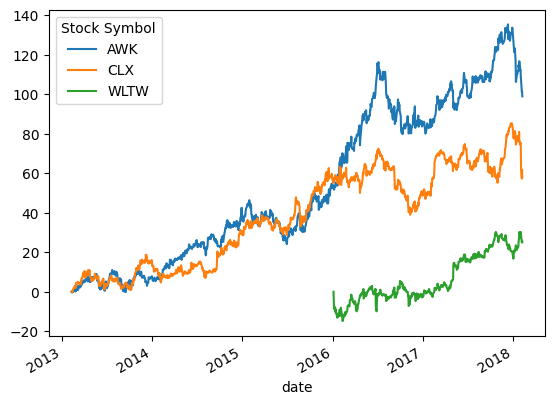

In [107]:
dfKOAAPL = df[(df['Name'] == "AWK") | (df['Name'] == "CLX")  | (df['Name'] == "WLTW") ]
dfKOAAPL.groupby('Name')["percent_change"].plot(kind='line')
plt.legend(title='Stock Symbol')
plt.show()